In [92]:
import pandas as pd
import numpy as np

In [93]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('submission.csv')

In [94]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,270.000000,600.000000,600.000000,600.000000,600.000000
mean,100.863333,1050442.891420,0.876667,151.118333,3.706667,708181.751667
std,18.097528,1791408.303462,1.183409,165.654671,2.446889,1828005.851144
min,45.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,89.000000,20380.000000,0.000000,17.000000,2.000000,1297.250000
50%,100.000000,478423.625000,0.000000,82.500000,3.000000,12591.000000
75%,114.000000,1286568.625000,2.000000,264.000000,4.000000,479886.750000
max,180.000000,17615314.000000,5.000000,869.000000,25.000000,14262766.000000


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [96]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,107.000000,243.000000,243.000000,243.000000
mean,109.798354,891669.516044,0.851852,159.316872,3.477366
std,124.022711,1217341.454572,1.200321,162.976607,2.111192
min,40.000000,34.000000,0.000000,0.000000,0.000000
25%,91.000000,62502.000000,0.000000,18.000000,2.000000
50%,104.000000,493120.000000,0.000000,105.000000,3.000000
75%,114.500000,1080849.583333,1.000000,282.000000,4.000000
max,2015.000000,6173099.500000,6.000000,776.000000,16.000000


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [98]:
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


In [99]:
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

In [100]:
train['genre_rank'] = train['genre'].map({
    '드라마':0,'다큐멘터리':1,'멜로/로맨스':2,
    '코미디':3,'공포':4,'액션':5,'느와르':6,
    '애니메이션':7,'미스터리':8,'SF':9,'뮤지컬':10,'서스펜스':11
})

test['genre_rank'] = test['genre'].map({
    '드라마':0,'다큐멘터리':1,'멜로/로맨스':2,
    '코미디':3,'공포':4,'액션':5,'느와르':6,
    '애니메이션':7,'미스터리':8,'SF':9,'뮤지컬':10,'서스펜스':11
})


In [104]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

<AxesSubplot:>

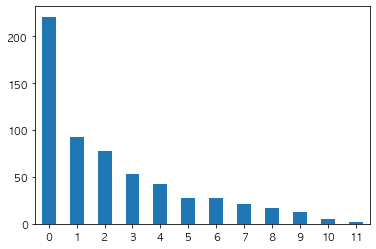

In [103]:
train['genre_rank'].value_counts().plot(kind='bar',rot=0)

<AxesSubplot:xlabel='box_off_num', ylabel='genre'>

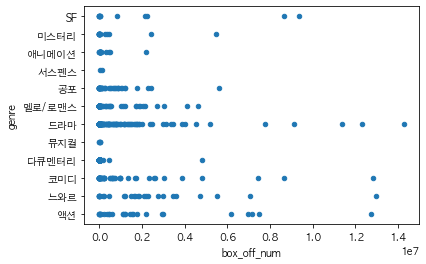

In [105]:
train.plot('box_off_num','genre',kind='scatter')

In [106]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [107]:
train['screening_rat_rank']=train['screening_rat'].map({
    '청소년 관람불가':0,
    '15세 관람가':1,
    '12세 관람가':2,
    '전체 관람가':3
})
test['screening_rat_rank']=test['screening_rat'].map({
    '청소년 관람불가':0,
    '15세 관람가':1,
    '12세 관람가':2,
    '전체 관람가':3
})

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               600 non-null    object 
 1   distributor         600 non-null    object 
 2   genre               600 non-null    object 
 3   release_time        600 non-null    object 
 4   time                600 non-null    int64  
 5   screening_rat       600 non-null    object 
 6   director            600 non-null    object 
 7   dir_prev_bfnum      270 non-null    float64
 8   dir_prev_num        600 non-null    int64  
 9   num_staff           600 non-null    int64  
 10  num_actor           600 non-null    int64  
 11  box_off_num         600 non-null    int64  
 12  genre_rank          600 non-null    int64  
 13  screening_rat_rank  600 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 65.8+ KB


In [87]:
pd.options.display.float_format = '{:1f}'.format

In [110]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬         6627.000000
다큐멘터리      67172.258065
서스펜스       82611.000000
애니메이션     181926.666667
멜로/로맨스    425968.038462
미스터리      527548.176471
공포        590832.523810
드라마       625689.791855
코미디      1193914.000000
SF       1788345.692308
액션       2203974.071429
느와르      2263695.111111
Name: box_off_num, dtype: float64